https://docs.google.com/spreadsheets/d/1WSCOH98TS7zpwkWU5DE4-77I3bRuT9Sd5AAQRTkD81s/edit#gid=0

In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline

In [3]:
import pandas_profiling

/root/anaconda3/lib/python3.6/site-packages/pandas_profiling/plot.py:15: UserWarning: matplotlib.pyplot as already been imported, this call will have no effect.
  matplotlib.use(BACKEND)


In [3]:
from sklearn import preprocessing

In [5]:
train = pd.read_csv('/data/kaggle_microsoft/train.csv')
train.head()

/root/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2698: DtypeWarning: Columns (28) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,MachineIdentifier,ProductName,EngineVersion,AppVersion,AvSigVersion,IsBeta,RtpStateBitfield,IsSxsPassiveMode,DefaultBrowsersIdentifier,AVProductStatesIdentifier,...,Census_FirmwareVersionIdentifier,Census_IsSecureBootEnabled,Census_IsWIMBootEnabled,Census_IsVirtualDevice,Census_IsTouchEnabled,Census_IsPenCapable,Census_IsAlwaysOnAlwaysConnectedCapable,Wdft_IsGamer,Wdft_RegionIdentifier,HasDetections
0,0000028988387b115f69f31a3bf04f09,win8defender,1.1.15100.1,4.18.1807.18075,1.273.1735.0,0,7.0,0,NaN,53447.0,...,36144.0,0,NaN,0.0,0,0,0.0,0.0,10.0,0
1,000007535c3f730efa9ea0b7ef1bd645,win8defender,1.1.14600.4,4.13.17134.1,1.263.48.0,0,7.0,0,NaN,53447.0,...,57858.0,0,NaN,0.0,0,0,0.0,0.0,8.0,0
2,000007905a28d863f6d0d597892cd692,win8defender,1.1.15100.1,4.18.1807.18075,1.273.1341.0,0,7.0,0,NaN,53447.0,...,52682.0,0,NaN,0.0,0,0,0.0,0.0,3.0,0
3,00000b11598a75ea8ba1beea8459149f,win8defender,1.1.15100.1,4.18.1807.18075,1.273.1527.0,0,7.0,0,NaN,53447.0,...,20050.0,0,NaN,0.0,0,0,0.0,0.0,3.0,1
4,000014a5f00daa18e76b81417eeb99fc,win8defender,1.1.15100.1,4.18.1807.18075,1.273.1379.0,0,7.0,0,NaN,53447.0,...,19844.0,0,0.0,0.0,0,0,0.0,0.0,1.0,1


In [8]:
test = pd.read_csv('/data/kaggle_microsoft/test.csv')
test.head()

/root/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2698: DtypeWarning: Columns (28) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,MachineIdentifier,ProductName,EngineVersion,AppVersion,AvSigVersion,IsBeta,RtpStateBitfield,IsSxsPassiveMode,DefaultBrowsersIdentifier,AVProductStatesIdentifier,...,Census_FirmwareManufacturerIdentifier,Census_FirmwareVersionIdentifier,Census_IsSecureBootEnabled,Census_IsWIMBootEnabled,Census_IsVirtualDevice,Census_IsTouchEnabled,Census_IsPenCapable,Census_IsAlwaysOnAlwaysConnectedCapable,Wdft_IsGamer,Wdft_RegionIdentifier
0,0000010489e3af074adeac69c53e555e,win8defender,1.1.15400.5,4.18.1810.5,1.281.501.0,0,7.0,0,NaN,53447.0,...,807.0,8554.0,1,NaN,0.0,0,0,0.0,0.0,7.0
1,00000176ac758d54827acd545b6315a5,win8defender,1.1.15400.4,4.18.1809.2,1.279.301.0,0,7.0,0,NaN,53447.0,...,554.0,33105.0,1,NaN,0.0,0,0,0.0,1.0,12.0
2,0000019dcefc128c2d4387c1273dae1d,win8defender,1.1.15300.6,4.18.1809.2,1.277.230.0,0,7.0,0,NaN,49480.0,...,556.0,63396.0,1,NaN,0.0,0,0,0.0,1.0,11.0
3,0000055553dc51b1295785415f1a224d,win8defender,1.1.15400.5,4.18.1810.5,1.281.664.0,0,7.0,0,NaN,42160.0,...,628.0,26320.0,1,0.0,0.0,0,0,0.0,0.0,10.0
4,00000574cefffeca83ec8adf9285b2bf,win8defender,1.1.15400.4,4.18.1809.2,1.279.236.0,0,7.0,0,NaN,53447.0,...,556.0,63269.0,1,NaN,0.0,0,0,0.0,1.0,3.0


In [ ]:
train.columns

In [ ]:
test.columns

In [6]:
set(train.columns) - set(test.columns)

{'HasDetections'}

In [7]:
set(test.columns) - set(train.columns)

set()

In [8]:
train.describe()

,IsBeta,RtpStateBitfield,IsSxsPassiveMode,DefaultBrowsersIdentifier,AVProductStatesIdentifier,AVProductsInstalled,AVProductsEnabled,HasTpm,CountryIdentifier,CityIdentifier,...,Census_FirmwareVersionIdentifier,Census_IsSecureBootEnabled,Census_IsWIMBootEnabled,Census_IsVirtualDevice,Census_IsTouchEnabled,Census_IsPenCapable,Census_IsAlwaysOnAlwaysConnectedCapable,Wdft_IsGamer,Wdft_RegionIdentifier,HasDetections
count,8.921483e+06,8.889165e+06,8.921483e+06,433438.000000,8.885262e+06,8.885262e+06,8.885262e+06,8.921483e+06,8.921483e+06,8.596074e+06,...,8.761350e+06,8.921483e+06,3.261780e+06,8.905530e+06,8.921483e+06,8.921483e+06,8.850140e+06,8.618032e+06,8.618032e+06,8.921483e+06
mean,7.509962e-06,6.845332e+00,1.733378e-02,1658.355421,4.784001e+04,1.326779e+00,1.020967e+00,9.879711e-01,1.080490e+02,8.126653e+04,...,3.302792e+04,4.860229e-01,3.065811e-07,7.039446e-03,1.255431e-01,3.807091e-02,5.741920e-02,2.835785e-01,7.883565e+00,4.997927e-01
std,2.740421e-03,1.026055e+00,1.305118e-01,998.960373,1.403237e+04,5.229272e-01,1.675544e-01,1.090149e-01,6.304706e+01,4.892339e+04,...,2.120691e+04,4.998046e-01,5.536976e-04,8.360558e-02,3.313338e-01,1.913675e-01,2.326419e-01,4.507347e-01,4.550121e+00,5.000000e-01
min,0.000000e+00,0.000000e+00,0.000000e+00,1.000000,3.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,5.000000e+00,...,3.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00
25%,0.000000e+00,7.000000e+00,0.000000e+00,788.000000,4.948000e+04,1.000000e+00,1.000000e+00,1.000000e+00,5.100000e+01,3.682500e+04,...,1.315600e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.000000e+00,0.000000e+00
50%,0.000000e+00,7.000000e+00,0.000000e+00,1632.000000,5.344700e+04,1.000000e+00,1.000000e+00,1.000000e+00,9.700000e+01,8.237300e+04,...,3.307000e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+01,0.000000e+00
75%,0.000000e+00,7.000000e+00,0.000000e+00,2373.000000,5.344700e+04,2.000000e+00,1.000000e+00,1.000000e+00,1.620000e+02,1.237000e+05,...,5.243600e+04,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.100000e+01,1.000000e+00
max,1.000000e+00,3.500000e+01,1.000000e+00,3213.000000,7.050700e+04,7.000000e+00,5.000000e+00,1.000000e+00,2.220000e+02,1.679620e+05,...,7.210500e+04,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.500000e+01,1.000000e+00


In [19]:
test.describe()

,IsBeta,RtpStateBitfield,IsSxsPassiveMode,DefaultBrowsersIdentifier,AVProductStatesIdentifier,AVProductsInstalled,AVProductsEnabled,HasTpm,CountryIdentifier,CityIdentifier,...,Census_FirmwareManufacturerIdentifier,Census_FirmwareVersionIdentifier,Census_IsSecureBootEnabled,Census_IsWIMBootEnabled,Census_IsVirtualDevice,Census_IsTouchEnabled,Census_IsPenCapable,Census_IsAlwaysOnAlwaysConnectedCapable,Wdft_IsGamer,Wdft_RegionIdentifier
count,7.853253e+06,7.821031e+06,7.853253e+06,307119.000000,7.829486e+06,7.829486e+06,7.829486e+06,7.853253e+06,7.853253e+06,7.661291e+06,...,7.654619e+06,7.675629e+06,7.853253e+06,2.330546e+06,7.835962e+06,7.853253e+06,7.853253e+06,7.763101e+06,7.550396e+06,7.550396e+06
mean,5.857445e-06,6.852231e+00,1.586807e-02,1604.120797,4.944972e+04,1.273465e+00,1.018253e+00,9.917166e-01,1.094486e+02,8.121278e+04,...,3.966691e+02,3.267878e+04,4.513596e-01,4.290840e-07,8.248381e-03,1.182907e-01,3.794440e-02,5.448467e-02,2.977041e-01,7.701044e+00
std,2.420209e-03,1.009466e+00,1.249651e-01,1049.237340,1.226556e+04,4.916655e-01,1.551581e-01,9.063571e-02,6.318849e+01,4.903231e+04,...,2.218320e+02,2.114642e+04,4.976285e-01,6.550450e-04,9.044527e-02,3.229521e-01,1.910618e-01,2.269716e-01,4.572487e-01,4.529220e+00
min,0.000000e+00,0.000000e+00,0.000000e+00,1.000000,2.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,...,1.000000e+00,5.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
25%,0.000000e+00,7.000000e+00,0.000000e+00,508.000000,5.344700e+04,1.000000e+00,1.000000e+00,1.000000e+00,5.100000e+01,3.682900e+04,...,1.420000e+02,1.260600e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.000000e+00
50%,0.000000e+00,7.000000e+00,0.000000e+00,1632.000000,5.344700e+04,1.000000e+00,1.000000e+00,1.000000e+00,9.700000e+01,8.237300e+04,...,4.860000e+02,3.306000e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+01
75%,0.000000e+00,7.000000e+00,0.000000e+00,2377.000000,5.344700e+04,2.000000e+00,1.000000e+00,1.000000e+00,1.640000e+02,1.232060e+05,...,5.560000e+02,5.208100e+04,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.100000e+01
max,1.000000e+00,4.000000e+01,1.000000e+00,3214.000000,7.050200e+04,6.000000e+00,5.000000e+00,1.000000e+00,2.220000e+02,1.679620e+05,...,1.088000e+03,7.211100e+04,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.500000e+01


In [15]:
!pwd

/data/kaggle_data_ga_crp


In [14]:
profile = pandas_profiling.ProfileReport(train)
rejected_variables = profile.get_rejected_variables(threshold=0.9)
profile.to_file(outputfile="pandas_profiling_output_train.html")

/root/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1238: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))
/root/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1238: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))
/root/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1238: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))
/root/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1238: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))
/root/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1238: UserWarning: findfont: Font family ['sans-serif

In [16]:
rejected_variables

['Census_InternalPrimaryDisplayResolutionVertical',
 'Census_OSBuildNumber',
 'Census_OSUILocaleIdentifier']

In [17]:
test_profile = pandas_profiling.ProfileReport(test)
test_rejected_variables = test_profile.get_rejected_variables(threshold=0.9)
test_profile.to_file(outputfile="pandas_profiling_output_test.html")

/root/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1238: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))
/root/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1238: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))
/root/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1238: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))
/root/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1238: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))
/root/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1238: UserWarning: findfont: Font family ['sans-serif

In [21]:
train.columns

Index(['MachineIdentifier', 'ProductName', 'EngineVersion', 'AppVersion',
       'AvSigVersion', 'IsBeta', 'RtpStateBitfield', 'IsSxsPassiveMode',
       'DefaultBrowsersIdentifier', 'AVProductStatesIdentifier',
       'AVProductsInstalled', 'AVProductsEnabled', 'HasTpm',
       'CountryIdentifier', 'CityIdentifier', 'OrganizationIdentifier',
       'GeoNameIdentifier', 'LocaleEnglishNameIdentifier', 'Platform',
       'Processor', 'OsVer', 'OsBuild', 'OsSuite', 'OsPlatformSubRelease',
       'OsBuildLab', 'SkuEdition', 'IsProtected', 'AutoSampleOptIn', 'PuaMode',
       'SMode', 'IeVerIdentifier', 'SmartScreen', 'Firewall', 'UacLuaenable',
       'Census_MDC2FormFactor', 'Census_DeviceFamily',
       'Census_OEMNameIdentifier', 'Census_OEMModelIdentifier',
       'Census_ProcessorCoreCount', 'Census_ProcessorManufacturerIdentifier',
       'Census_ProcessorModelIdentifier', 'Census_ProcessorClass',
       'Census_PrimaryDiskTotalCapacity', 'Census_PrimaryDiskTypeName',
       'Census_

# Variables reject due to high cardinality
['Census_InternalPrimaryDisplayResolutionVertical',
 'Census_OSBuildNumber',
 'Census_OSUILocaleIdentifier']

# Ignore
MachineIdentifier

# Variable having mostly missing values
Census_InternalBatteryType (76.1%)

Census_IsFlightingInternal (85%)

Census_IsWIMBootEnabled (70.3%)

Census_ProcessorClass (99.8%)

Census_ThresholdOptIn (70.4%)

DefaultBrowsersIdentifier (96.1%)

PuaMode (100%)

SMode (74.3%)



# Other ignore as difference in training and test set

AppVersion

# One hot encode
ProductName
IsBeta
IsSxsPassiveMode
Platform
Processor
OsPlatformSubRelease
Census_DeviceFamily
Census_ProcessorClass
Census_PrimaryDiskTypeName
SkuEdition
PuaMode
Census_PowerPlatformRoleName
Census_OSArchitecture
Census_OSInstallTypeName
Census_OSWUAutoUpdateOptionsName
Census_GenuineStateName
Census_ActivationChannel


# First cardinality reduce then One hot encode
OsVer
Census_ChassisTypeName
Census_OSBranch
Census_OSEdition
Census_OSSkuName
Census_FlightRing
EngineVersion
OsBuildLab
Census_MDC2FormFactor
#Census_InternalBatteryType [Mostly missing]<br>
#AppVersion [Remember: Test dataset has more different values]


In [9]:
train_one_hot = pd.get_dummies(train[['ProductName','IsBeta','IsSxsPassiveMode','Platform','Processor','OsPlatformSubRelease','Census_DeviceFamily','Census_ProcessorClass','Census_PrimaryDiskTypeName','SkuEdition','PuaMode','Census_PowerPlatformRoleName','Census_OSArchitecture','Census_OSInstallTypeName','Census_OSWUAutoUpdateOptionsName','Census_GenuineStateName','Census_ActivationChannel']])

In [10]:
test_one_hot = pd.get_dummies(test[['ProductName','IsBeta','IsSxsPassiveMode','Platform','Processor','OsPlatformSubRelease','Census_DeviceFamily','Census_ProcessorClass','Census_PrimaryDiskTypeName','SkuEdition','PuaMode','Census_PowerPlatformRoleName','Census_OSArchitecture','Census_OSInstallTypeName','Census_OSWUAutoUpdateOptionsName','Census_GenuineStateName','Census_ActivationChannel']])

In [11]:
train['OsVer_low_dim'] = train['OsVer'].apply(lambda x : str(x) if str(x) in ['10.0.0.0', '6.3.0.0', '6.1.1.0'] else 'others')

In [12]:
test['OsVer_low_dim'] = test['OsVer'].apply(lambda x : str(x) if str(x) in ['10.0.0.0', '6.3.0.0', '6.1.1.0'] else 'others')

In [13]:
train['Census_ChassisTypeName_low_dim'] = train['Census_ChassisTypeName'].apply(lambda x : str(x) if str(x) in ['Notebook', 'Desktop', 'Laptop', 'Portable', 'AllinOne', 'MiniTower'] else 'others')

In [14]:
test['Census_ChassisTypeName_low_dim'] = test['Census_ChassisTypeName'].apply(lambda x : str(x) if str(x) in ['Notebook', 'Desktop', 'Laptop', 'Portable', 'AllinOne', 'MiniTower'] else 'others')

In [15]:
train['SmartScreen_low_dim'] = train['SmartScreen'].apply(lambda x : str(x) if str(x) in ['RequireAdmin', 'ExistsNotSet', 'Off', 'Warn', 'Prompt', 'Block'] else 'others')

In [16]:
test['SmartScreen_low_dim'] = test['SmartScreen'].apply(lambda x : str(x) if str(x) in ['RequireAdmin', 'ExistsNotSet', 'Off', 'Warn', 'Prompt', 'Block'] else 'others')

In [17]:
train['Census_MDC2FormFactor_low_dim'] = train['Census_MDC2FormFactor'].apply(lambda x : str(x) if str(x) in ['Notebook', 'Desktop', 'Convertible', 'AllInOne', 'Detachable', 'PCOther', 'LargeTablet'] else 'others')

In [18]:
test['Census_MDC2FormFactor_low_dim'] = test['Census_MDC2FormFactor'].apply(lambda x : str(x) if str(x) in ['Notebook', 'Desktop', 'Convertible', 'AllInOne', 'Detachable', 'PCOther', 'LargeTablet'] else 'others')

In [44]:
#MOSTLY MISSING
#train['Census_InternalBatteryType_low_dim']
#train['Census_InternalBatteryType'].apply(lambda x : str(x) if str(x) in ['Notebook', 'Desktop', 'Laptop', 'Portable', 'AllinOne', 'MiniTower'] else 'others')

In [19]:
train['Census_OSBranch_low_dim'] = train['Census_OSBranch'].apply(lambda x : str(x) if str(x) in ['rs4_release', 'rs3_release', 'rs3_release_svc_escrow', 'rs2_release', 'rs1_release', 'th2_release', 'th2_release_sec', 'th1_st1'] else 'others')

In [20]:
test['Census_OSBranch_low_dim'] = test['Census_OSBranch'].apply(lambda x : str(x) if str(x) in ['rs4_release', 'rs3_release', 'rs3_release_svc_escrow', 'rs2_release', 'rs1_release', 'th2_release', 'th2_release_sec', 'th1_st1'] else 'others')

In [21]:
train['Census_OSEdition_low_dim'] = train['Census_OSEdition'].apply(lambda x : str(x) if str(x) in ['Core', 'Professional', 'CoreSingleLanguage', 'CoreCountrySpecific'] else 'others')

In [22]:
test['Census_OSEdition_low_dim'] = test['Census_OSEdition'].apply(lambda x : str(x) if str(x) in ['Core', 'Professional', 'CoreSingleLanguage', 'CoreCountrySpecific'] else 'others')

In [23]:
train['Census_OSSkuName_low_dim'] = train['Census_OSSkuName'].apply(lambda x : str(x) if str(x) in ['CORE', 'PROFESSIONAL', 'CORE_SINGLELANGUAGE', 'CORE_COUNTRYSPECIFIC'] else 'others')

In [24]:
test['Census_OSSkuName_low_dim'] = test['Census_OSSkuName'].apply(lambda x : str(x) if str(x) in ['CORE', 'PROFESSIONAL', 'CORE_SINGLELANGUAGE', 'CORE_COUNTRYSPECIFIC'] else 'others')

In [25]:
train['Census_FlightRing_low_dim'] = train['Census_FlightRing'].apply(lambda x : str(x) if str(x) in ['Retail', 'NOT_SET', 'Unknown'] else 'others')

In [26]:
test['Census_FlightRing_low_dim'] = test['Census_FlightRing'].apply(lambda x : str(x) if str(x) in ['Retail', 'NOT_SET', 'Unknown'] else 'others')

In [27]:
train['EngineVersion_low_dim'] = train['EngineVersion'].apply(lambda x : str(x) if str(x) in ['1.1.15200.1', '1.1.15100.1', '1.1.15000.2', '1.1.14901.4', '1.1.14600.4', '1.1.14800.3', '1.1.15300.6', '1.1.14104.0'] else 'others')

In [28]:
test['EngineVersion_low_dim'] = test['EngineVersion'].apply(lambda x : str(x) if str(x) in ['1.1.15200.1', '1.1.15100.1', '1.1.15000.2', '1.1.14901.4', '1.1.14600.4', '1.1.14800.3', '1.1.15300.6', '1.1.14104.0'] else 'others')

In [47]:
#AppVersion : Ignore as several test values in not present in train set, and their distributions are different

In [29]:
train['OsBuildLab_low_dim'] = train['OsBuildLab'].apply(lambda x : str(x) if str(x) in ['17134.1.amd64fre.rs4_release.180410-1804', '16299.431.amd64fre.rs3_release_svc_escrow.180502-1908', '16299.15.amd64fre.rs3_release.170928-1534', '15063.0.amd64fre.rs2_release.170317-1834', '17134.1.x86fre.rs4_release.180410-1804', '16299.15.x86fre.rs3_release.170928-1534', '14393.2189.amd64fre.rs1_release.180329-1711', '10240.17443.amd64fre.th1.170602-2340', '10586.1176.amd64fre.th2_release_sec.170913-1848'] else 'others')

In [30]:
test['OsBuildLab_low_dim'] = test['OsBuildLab'].apply(lambda x : str(x) if str(x) in ['17134.1.amd64fre.rs4_release.180410-1804', '16299.431.amd64fre.rs3_release_svc_escrow.180502-1908', '16299.15.amd64fre.rs3_release.170928-1534', '15063.0.amd64fre.rs2_release.170317-1834', '17134.1.x86fre.rs4_release.180410-1804', '16299.15.x86fre.rs3_release.170928-1534', '14393.2189.amd64fre.rs1_release.180329-1711', '10240.17443.amd64fre.th1.170602-2340', '10586.1176.amd64fre.th2_release_sec.170913-1848'] else 'others')

In [31]:
train_low_dim_one_hot = pd.get_dummies(train[['OsVer_low_dim', 'Census_ChassisTypeName_low_dim', 'Census_OSBranch_low_dim', 'Census_OSEdition_low_dim', 'Census_OSSkuName_low_dim', 'Census_FlightRing_low_dim', 'EngineVersion_low_dim', 'OsBuildLab_low_dim', 'Census_MDC2FormFactor_low_dim', 'SmartScreen_low_dim']])

In [32]:
test_low_dim_one_hot = pd.get_dummies(test[['OsVer_low_dim', 'Census_ChassisTypeName_low_dim', 'Census_OSBranch_low_dim', 'Census_OSEdition_low_dim', 'Census_OSSkuName_low_dim', 'Census_FlightRing_low_dim', 'EngineVersion_low_dim', 'OsBuildLab_low_dim', 'Census_MDC2FormFactor_low_dim', 'SmartScreen_low_dim']])

In [33]:
train_removed = train.drop(['Census_InternalPrimaryDisplayResolutionVertical', 'Census_OSBuildNumber', 'Census_OSUILocaleIdentifier', 'MachineIdentifier', 'Census_InternalBatteryType', 'Census_IsFlightingInternal', 'Census_IsWIMBootEnabled', 'Census_ProcessorClass', 'Census_ThresholdOptIn', 'DefaultBrowsersIdentifier', 'PuaMode', 'SMode', 'AppVersion','ProductName','IsBeta','IsSxsPassiveMode','Platform','Processor','OsPlatformSubRelease','Census_MDC2FormFactor','Census_DeviceFamily','Census_ProcessorClass','Census_PrimaryDiskTypeName','SkuEdition','PuaMode','SmartScreen','Census_PowerPlatformRoleName','Census_OSArchitecture','Census_OSInstallTypeName','Census_OSWUAutoUpdateOptionsName','Census_GenuineStateName','Census_ActivationChannel','OsVer', 'Census_ChassisTypeName','Census_OSBranch','Census_OSEdition','Census_OSSkuName','Census_FlightRing','EngineVersion','OsBuildLab', 'AvSigVersion', 'Census_OSVersion', 'AvSigVersion','Census_OSVersion','OsVer_low_dim','Census_ChassisTypeName_low_dim','Census_OSBranch_low_dim','Census_OSEdition_low_dim','Census_OSSkuName_low_dim','Census_FlightRing_low_dim','EngineVersion_low_dim','OsBuildLab_low_dim','Census_MDC2FormFactor_low_dim', 'SmartScreen_low_dim'],axis=1)
test_removed = test.drop(['Census_InternalPrimaryDisplayResolutionVertical', 'Census_OSBuildNumber', 'Census_OSUILocaleIdentifier', 'MachineIdentifier', 'Census_InternalBatteryType', 'Census_IsFlightingInternal', 'Census_IsWIMBootEnabled', 'Census_ProcessorClass', 'Census_ThresholdOptIn', 'DefaultBrowsersIdentifier', 'PuaMode', 'SMode', 'AppVersion','ProductName','IsBeta','IsSxsPassiveMode','Platform','Processor','OsPlatformSubRelease','Census_MDC2FormFactor','Census_DeviceFamily','Census_ProcessorClass','Census_PrimaryDiskTypeName','SkuEdition','PuaMode','SmartScreen','Census_PowerPlatformRoleName','Census_OSArchitecture','Census_OSInstallTypeName','Census_OSWUAutoUpdateOptionsName','Census_GenuineStateName','Census_ActivationChannel','OsVer', 'Census_ChassisTypeName','Census_OSBranch','Census_OSEdition','Census_OSSkuName','Census_FlightRing','EngineVersion','OsBuildLab', 'AvSigVersion', 'Census_OSVersion','AvSigVersion','Census_OSVersion','OsVer_low_dim','Census_ChassisTypeName_low_dim','Census_OSBranch_low_dim','Census_OSEdition_low_dim','Census_OSSkuName_low_dim','Census_FlightRing_low_dim','EngineVersion_low_dim','OsBuildLab_low_dim', 'Census_MDC2FormFactor_low_dim', 'SmartScreen_low_dim'],axis=1)

In [34]:
train_use = pd.concat([train_removed, train_one_hot, train_low_dim_one_hot], axis=1)

In [35]:
test_use = pd.concat([test_removed, test_one_hot, test_low_dim_one_hot], axis=1)

In [36]:
len(train_use.columns)

194

In [37]:
len(test_use.columns)

193

In [38]:
set(train_use.columns) - set(test_use.columns)

{'HasDetections'}

In [39]:
set(test_use.columns) - set(train_use.columns)

set()

In [40]:
for col in train_use.columns:
    if train_use[col].dtype=='O':
        print(col)

In [41]:
for col in test_use.columns:
    if test_use[col].dtype=='O':
        print(col)

In [42]:
train_use.head()

,RtpStateBitfield,AVProductStatesIdentifier,AVProductsInstalled,AVProductsEnabled,HasTpm,CountryIdentifier,CityIdentifier,OrganizationIdentifier,GeoNameIdentifier,LocaleEnglishNameIdentifier,...,Census_MDC2FormFactor_low_dim_Notebook,Census_MDC2FormFactor_low_dim_PCOther,Census_MDC2FormFactor_low_dim_others,SmartScreen_low_dim_Block,SmartScreen_low_dim_ExistsNotSet,SmartScreen_low_dim_Off,SmartScreen_low_dim_Prompt,SmartScreen_low_dim_RequireAdmin,SmartScreen_low_dim_Warn,SmartScreen_low_dim_others
0,7.0,53447.0,1.0,1.0,1,29,128035.0,18.0,35.0,171,...,0,0,0,0,0,0,0,0,0,1
1,7.0,53447.0,1.0,1.0,1,93,1482.0,18.0,119.0,64,...,1,0,0,0,0,0,0,0,0,1
2,7.0,53447.0,1.0,1.0,1,86,153579.0,18.0,64.0,49,...,0,0,0,0,0,0,0,1,0,0
3,7.0,53447.0,1.0,1.0,1,88,20710.0,NaN,117.0,115,...,0,0,0,0,1,0,0,0,0,0
4,7.0,53447.0,1.0,1.0,1,18,37376.0,NaN,277.0,75,...,1,0,0,0,0,0,0,1,0,0


In [43]:
test_use.head()

,RtpStateBitfield,AVProductStatesIdentifier,AVProductsInstalled,AVProductsEnabled,HasTpm,CountryIdentifier,CityIdentifier,OrganizationIdentifier,GeoNameIdentifier,LocaleEnglishNameIdentifier,...,Census_MDC2FormFactor_low_dim_Notebook,Census_MDC2FormFactor_low_dim_PCOther,Census_MDC2FormFactor_low_dim_others,SmartScreen_low_dim_Block,SmartScreen_low_dim_ExistsNotSet,SmartScreen_low_dim_Off,SmartScreen_low_dim_Prompt,SmartScreen_low_dim_RequireAdmin,SmartScreen_low_dim_Warn,SmartScreen_low_dim_others
0,7.0,53447.0,1.0,1.0,1,43,58552.0,18.0,53.0,42,...,1,0,0,0,0,0,0,0,0,1
1,7.0,53447.0,1.0,1.0,1,68,71395.0,NaN,276.0,74,...,1,0,0,0,0,0,0,1,0,0
2,7.0,49480.0,2.0,1.0,1,201,66202.0,NaN,267.0,251,...,1,0,0,0,0,0,0,1,0,0
3,7.0,42160.0,2.0,1.0,1,29,120917.0,NaN,35.0,171,...,1,0,0,0,0,0,0,1,0,0
4,7.0,53447.0,1.0,1.0,1,171,124736.0,18.0,211.0,182,...,1,0,0,0,0,0,0,1,0,0


In [44]:
train_use.to_csv('/data/kaggle_microsoft/train_use.csv', index = False)

In [45]:
test_use.to_csv('/data/kaggle_microsoft/test_use.csv', index = False)

# Label encoder [Map to 0,1,2 ...]

## Sort then label encoder use
AvSigVersion [Remember: Test dataset has more different values] <br>
Census_OSVersion [Remember: Test dataset has more different values]

In [57]:
# le1 = preprocessing.LabelEncoder()
# le1.fit(train['AvSigVersion'])

# le2 = preprocessing.LabelEncoder()
# le2.fit(train['Census_OSVersion'])

In [54]:
#train['AvSigVersion_encoded'] = le1.transform(train['AvSigVersion'])

In [56]:
#le1.transform(test['AvSigVersion'])

## Ignore AvSigVersion and Census_OSVersion for the time being

# Target
HasDetections

# As it is
All the rest

In [ ]:
train_one_hot
test_one_hot

train_low_dim_one_hot
test_low_dim_one_hot

# Future Work

1) May parse into parts : OsBuildLab

2) Their exists various variables which are getting numeric but are categorical if their definitions is looked after from https://www.kaggle.com/c/microsoft-malware-prediction/data. May treat them seperately

3) EngineVersion may be encoded after sorting by name (text)

In [22]:
for col in train.columns:
    if train[col].dtype=='O':
        print(col)

MachineIdentifier
ProductName
EngineVersion
AppVersion
AvSigVersion
Platform
Processor
OsVer
OsPlatformSubRelease
OsBuildLab
SkuEdition
PuaMode
SmartScreen
Census_MDC2FormFactor
Census_DeviceFamily
Census_ProcessorClass
Census_PrimaryDiskTypeName
Census_ChassisTypeName
Census_PowerPlatformRoleName
Census_InternalBatteryType
Census_OSVersion
Census_OSArchitecture
Census_OSBranch
Census_OSEdition
Census_OSSkuName
Census_OSInstallTypeName
Census_OSWUAutoUpdateOptionsName
Census_GenuineStateName
Census_ActivationChannel
Census_FlightRing


# Model building

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
from IPython import get_ipython
import seaborn as sns
from sklearn.feature_selection import RFECV,RFE,VarianceThreshold
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,roc_curve,classification_report,confusion_matrix,precision_recall_curve,auc
from sklearn.preprocessing import StandardScaler,scale,Normalizer
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV,cross_val_score
from xgboost import XGBClassifier
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale,StandardScaler,RobustScaler,Normalizer
from sklearn.feature_selection import SelectKBest,f_regression,f_classif,SelectFromModel
import xgboost as xgb
import warnings

% matplotlib inline
warnings.filterwarnings('ignore')

/root/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [5]:
train_use = pd.read_csv('/data/kaggle_microsoft/train_use.csv')

In [6]:
test_use = pd.read_csv('/data/kaggle_microsoft/test_use.csv')

## Missing value treatment : Yet to be done




In [7]:
X = train_use.drop(['HasDetections'], axis =1)
y = train_use['HasDetections']
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.33, random_state=42,stratify = y)

In [8]:
## function for plotting importance
def plot_importance(var,imp):
    plt.figure(figsize=(8,6))
    plt.barh(range(len(var)),imp,align='center')
    plt.yticks(range(len(var)),var)
    plt.xlabel('Importance of features')
    plt.ylabel('Features')
    plt.show()

In [17]:
##Function to fit model on training data and gives accuracy and confusion matrix of train,validation and test data
def model(clf,train_X,train_y,test_X,test_y):
    clf.fit(train_X,train_y)  # fitting model
    #scoring data

    pred_tr=clf.predict(train_X)
    pred_test=clf.predict(test_X)
    fig, ax = plt.subplots(figsize=(8,6))
    print ('\nTraining Accuracy:{}'.format(accuracy_score(train_y,pred_tr)))
    print ('Training Confusion Matrix \n{}'.format(confusion_matrix(train_y,pred_tr)))
    print('Classification Report: \n{}'.format(classification_report(train_y,pred_tr)))
    pred_pr_tr=clf.predict_proba(train_X)[:,1]
    pred_pr_test=clf.predict_proba(test_X)[:,1]
    fpr,tpr,threshold=roc_curve(train_y,pred_pr_tr)
    ax.plot(fpr,tpr,label='Training AUC')
    print ('\nAUC:{}\n'.format(auc(fpr,tpr)))

    print ('\nTest Accuracy:{}'.format(accuracy_score(test_y,pred_test)))
    print ('Test Confusion Matrix \n{}'.format(confusion_matrix(test_y,pred_test)))
    print('Classification Report: \n{}'.format(classification_report(test_y,pred_test)))
    fpr,tpr,threshold=roc_curve(test_y,pred_pr_test)
    print ('\nAUC:{}\n'.format(auc(fpr,tpr)))
    ax.plot(fpr,tpr,label='Test AUC')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    ax.legend(loc='best')
    plt.show()

In [6]:
print( '***********Logistic Regression**********')
lr_clf=LogisticRegression(random_state=1)
model(lr_clf,train_X,train_y,test_X,test_y)

lr_train=lr_clf.predict(train_X)
lr_test=lr_clf.predict(test_X)
lr_pr_train=lr_clf.predict_proba(train_X)[:,1]
lr_pr_test=lr_clf.predict_proba(test_X)[:,1]
fpr, tpr, tresholds = roc_curve(train_y,lr_pr_train)

gini_train=2*(auc(fpr, tpr))-1
print('Gini (Train) : {}'.format(round(gini_train,2)))

fpr, tpr, tresholds = roc_curve(test_y,lr_pr_test)

gini_test=2*(auc(fpr, tpr))-1
print('Gini (Test) : {}'.format(round(gini_test,2)))

***********Logistic Regression**********


ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [7]:
print( '***********Random Forest**********')

rf_clf=RandomForestClassifier(n_estimators=100,max_depth=5,max_features='sqrt',random_state=1)
model(rf_clf,train_X,train_y,test_X,test_y)
rf_train=rf_clf.predict(train_X)
rf_test=rf_clf.predict(test_X)
rf_pr_train=rf_clf.predict_proba(train_X)[:,1]
rf_pr_test=rf_clf.predict_proba(test_X)[:,1]

var_imp=pd.DataFrame({'var':train_X.columns,'imp':rf_clf.feature_importances_})
var_imp.sort_values('imp',ascending=True,inplace=True)
plot_importance(var_imp['var'],var_imp['imp'])
fpr, tpr, tresholds = roc_curve(train_y,rf_pr_train)

gini_train=2*(auc(fpr, tpr))-1
print('Gini (Train) : {}'.format(round(gini_train,2)))

fpr, tpr, tresholds = roc_curve(test_y,rf_pr_test)

gini_test=2*(auc(fpr, tpr))-1
print('Gini (Test) : {}'.format(round(gini_test,2)))

***********Random Forest**********


ValueError: Input contains NaN, infinity or a value too large for dtype('float32').

In [ ]:
print( '***********XGBoost**********')

xgb_clf=XGBClassifier(n_estimators=100,learning_rate=0.03,max_depth=12,subsample=0.4,colsample_bytree= 0.4,reg_alpha= 10,seed=1)
model(xgb_clf,train_X,train_y,test_X,test_y)


xgb_train=xgb_clf.predict(train_X)
xgb_test=xgb_clf.predict(test_X)
xgb_pr_train=xgb_clf.predict_proba(train_X)[:,1]
xgb_pr_test=xgb_clf.predict_proba(test_X)[:,1]



fpr, tpr, tresholds = roc_curve(train_y,xgb_pr_train)


gini_train=2*(auc(fpr, tpr))-1
print('Gini (Train) : {}'.format(round(gini_train,2)))
fpr, tpr, tresholds = roc_curve(test_y,xgb_pr_test)


gini_test=2*(auc(fpr, tpr))-1
print('Gini (Test) : {}'.format(round(gini_test,2)))

import pickle
pickle.dump(xgb_clf, open("/data/kaggle_microsoft/xgb2.pickle.dat", "wb"))


***********XGBoost**********
[18:42:03] Tree method is automatically selected to be 'approx' for faster speed. to use old behavior(exact greedy algorithm on single machine), set tree_method to 'exact'


In [ ]:
predictions = xgb_clf.predict_proba(test_use)[:,1]
sample_sub = pd.read_csv('/data/kaggle_microsoft/sample_submission.csv')
del sample_sub['HasDetections']
sample_sub['HasDetections'] = predictions
sample_sub.to_csv('kaggle_microsoft_sub2.csv', index = False)

# Others


Training Accuracy:0.6395256259710546
Training Confusion Matrix 
[[1873535 1116401]
 [1038296 1949161]]
Classification Report: 
             precision    recall  f1-score   support

          0       0.64      0.63      0.63   2989936
          1       0.64      0.65      0.64   2987457

avg / total       0.64      0.64      0.64   5977393


AUC:0.7008515171785905


Test Accuracy:0.6390772700562822
Test Confusion Matrix 
[[921666 550989]
 [511600 959835]]
Classification Report: 
             precision    recall  f1-score   support

          0       0.64      0.63      0.63   1472655
          1       0.64      0.65      0.64   1471435

avg / total       0.64      0.64      0.64   2944090


AUC:0.7001858434157444



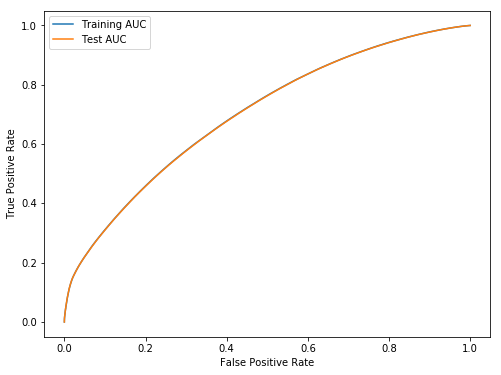

In [15]:
clf = xgb_clf
pred_tr=clf.predict(train_X)
pred_test=clf.predict(test_X)
fig, ax = plt.subplots(figsize=(8,6))
print ('\nTraining Accuracy:{}'.format(accuracy_score(train_y,pred_tr)))
print ('Training Confusion Matrix \n{}'.format(confusion_matrix(train_y,pred_tr)))
print('Classification Report: \n{}'.format(classification_report(train_y,pred_tr)))
pred_pr_tr=clf.predict_proba(train_X)[:,1]
pred_pr_test=clf.predict_proba(test_X)[:,1]
fpr,tpr,threshold=roc_curve(train_y,pred_pr_tr)
ax.plot(fpr,tpr,label='Training AUC')
print ('\nAUC:{}\n'.format(auc(fpr,tpr)))

print ('\nTest Accuracy:{}'.format(accuracy_score(test_y,pred_test)))
print ('Test Confusion Matrix \n{}'.format(confusion_matrix(test_y,pred_test)))
print('Classification Report: \n{}'.format(classification_report(test_y,pred_test)))
fpr,tpr,threshold=roc_curve(test_y,pred_pr_test)
print ('\nAUC:{}\n'.format(auc(fpr,tpr)))
ax.plot(fpr,tpr,label='Test AUC')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
ax.legend(loc='best')
plt.show()

In [16]:
xgb_train=xgb_clf.predict(train_X)
xgb_test=xgb_clf.predict(test_X)
xgb_pr_train=xgb_clf.predict_proba(train_X)[:,1]
xgb_pr_test=xgb_clf.predict_proba(test_X)[:,1]



fpr, tpr, tresholds = roc_curve(train_y,xgb_pr_train)


gini_train=2*(auc(fpr, tpr))-1
print('Gini (Train) : {}'.format(round(gini_train,2)))
fpr, tpr, tresholds = roc_curve(test_y,xgb_pr_test)


gini_test=2*(auc(fpr, tpr))-1
print('Gini (Test) : {}'.format(round(gini_test,2)))

Gini (Train) : 0.4
Gini (Test) : 0.4


In [ ]:
import pickle
pickle.dump(xgb_clf, open("/data/kaggle_microsoft/xgb1.pickle.dat", "wb"))